In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import plotly.express as px

# The data base that im going to use contains information related to a chain of superstores along the US.
# It contains information related to Sales, profits, segments, etc.

In [4]:
import csv

In [32]:
df = pd.read_csv('Sample - Superstore.csv', encoding = 'latin1')
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

# Im intrested in seeing where is the best market for this chain of superstores.
# Where is the state that has more sales?.

In [7]:
df.set_index('State', inplace=True)

In [8]:
df.sort_values(by='Sales', ascending=True, inplace=True)
top5 = df['Sales'].tail(5)
top5 

State
Delaware      10499.970
New York      11199.968
Washington    13999.960
Indiana       17499.950
Florida       22638.480
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Top 5 States with more Sales')

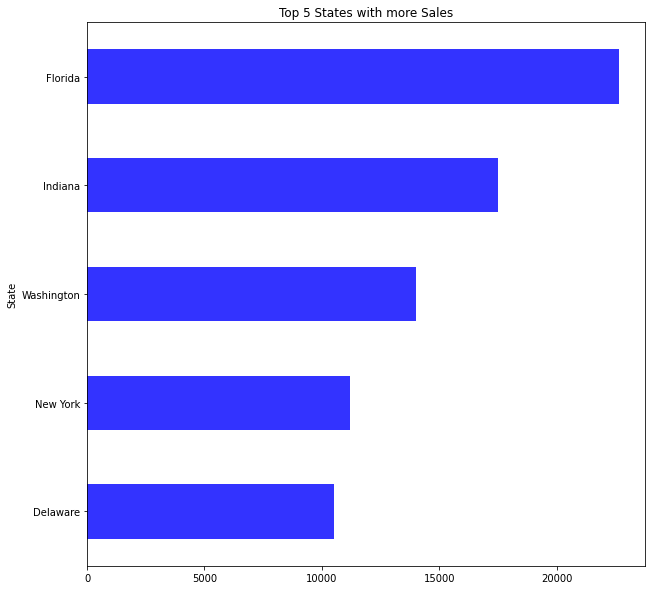

In [9]:
top5.plot(kind='barh', 
           figsize=(10, 10), 
           color='blue',
           alpha=0.8
          )

plt.title('Top 5 States with more Sales')

### By looking at this information we can see that Florida its the state were the superstore makes more sales.

# Im intrested in seeing where is the best market for this chain of superstores. 
# What state generates more Profit?.

In [10]:
df.sort_values(by='Profit', ascending=True, inplace=True)
top5P = df['Profit'].tail(5)
top5P 

State
Minnesota     4630.4755
Michigan      4946.3700
Delaware      5039.9856
Washington    6719.9808
Indiana       8399.9760
Name: Profit, dtype: float64

Text(0.5, 1.0, 'Top 5 most Profitable States')

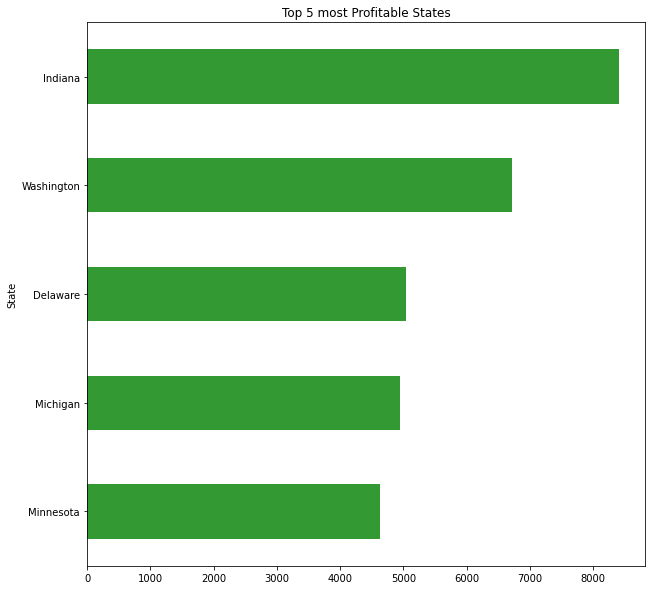

In [11]:
top5P.plot(kind='barh', 
           figsize=(10, 10), 
           color='green',
           alpha=0.8
          )
plt.title('Top 5 most Profitable States')

### By looking at this information we can see that indiana makes more proofit even tho 
### its not the state the supermarket make more sales

# Now that we know what state sells more and generates more profit for this chain of superstores. 
# What category generates more for the superstore?.

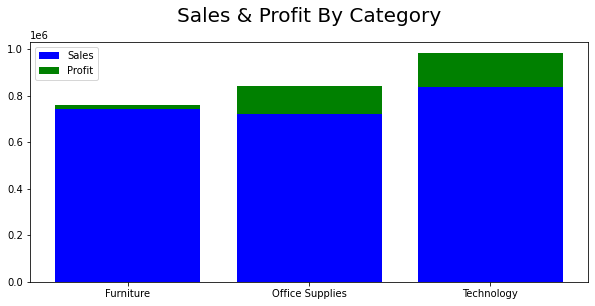

In [12]:
df_stackb = df[['Category','Sales','Profit']]
df_stackb = df_stackb.groupby(['Category']).sum().reset_index()
plt.figure(figsize=[10,15])
plt.subplot(3,1,1)
plt.bar(x=df_stackb['Category'], height=df_stackb['Sales'], color='blue')
plt.bar(x=df_stackb['Category'], height=df_stackb['Profit'], bottom=df_stackb['Sales'], color='green')
plt.title("Sales & Profit By Category", size=20, pad=20)
plt.legend(['Sales','Profit'])

### Now we can see that this supermarket makes more sales and profit out of the tecnology deparment.

# Sales in a supermarkket

## Description of the data set

#### This data set its about a super market where the dataset contains
#### Information related to Sales, Profits and other interesting facts of a Superstore giant.
#### like i saw on the firt part of the proyect, i realized some important points of the data set that i would like
#### to explore more

#### Critical variables identified, and interpretation of each variables.

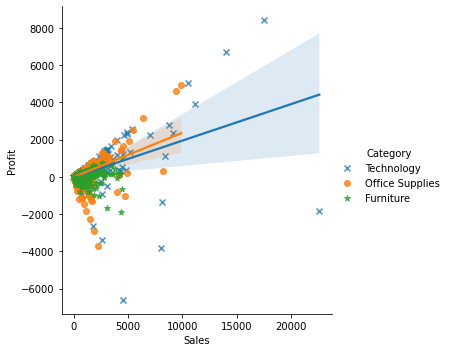

In [13]:
sns.lmplot(x='Sales', 
           y='Profit', 
           hue='Category', 
           markers=['x', 'o','*'],
           fit_reg=True, 
           data=df)

#### here we can see that the category that makes more for the company its technology

### Hypothesis (what do I think I can predict from what data)

#### my hypothesis with this data base its that i can look further to see how to sales and 
#### profit will perform over time

### Descriptive statistics of each of the critical variables

In [14]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [15]:
df['Category'].describe()

count                9994
unique                  3
top       Office Supplies
freq                 6026
Name: Category, dtype: object

In [16]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

### Prediction with the model based on point (3).

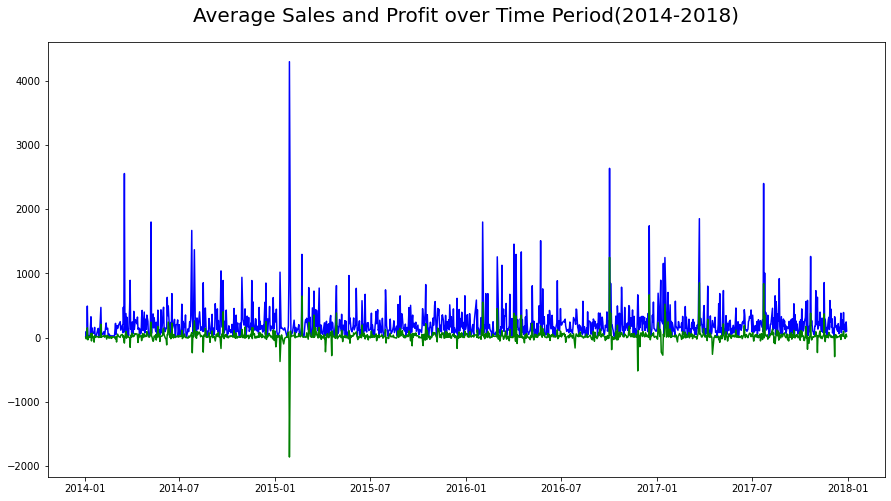

In [17]:
df_line = df[['Order Date','Sales','Profit']].sort_values('Order Date') 
df_line['Order Date'] = pd.to_datetime(df_line['Order Date'])
df_line = df_line.groupby('Order Date').mean()
plt.figure(figsize=[15,8])
plt.plot(df_line.index, 'Sales', data=df_line, color='blue')
plt.plot(df_line.index, 'Profit', data=df_line, color='green')
plt.title("Average Sales and Profit over Time Period(2014-2018)", size=20, pad=20)
plt.show()

## Linear Regression by years

In [18]:
df['Years']=pd.DatetimeIndex(df['Order Date']).year
df.Years

State
Ohio              2016
North Carolina    2017
Texas             2014
Colorado          2017
Illinois          2017
                  ... 
Minnesota         2014
Michigan          2016
Delaware          2017
Washington        2017
Indiana           2016
Name: Years, Length: 9994, dtype: int64

In [19]:
x=df[['Years','Quantity','Discount','Profit']]
y=df[['Sales']]

In [20]:
pip install 'sklearn'

Note: you may need to restart the kernel to use updated packages.


In [21]:
from sklearn import linear_model

lm = linear_model.LinearRegression()


X = pd.DataFrame(df['Years'])
Y = pd.DataFrame(df['Sales'])

model_lm = lm.fit(X, Y)
model_lm

# m = correlation between X and Y * (standard deviation of Y /     standard deviation of X)

LinearRegression()

In [22]:
print('The intercept is \t :\t', model_lm.intercept_)
print('The coefficients are \t : \t', model_lm.coef_)
print('Model score (R-squared) is : \t', model_lm.score(X, Y))

The intercept is 	 :	 [11051.7810065]
The coefficients are 	 : 	 [[-5.36875708]]
Model score (R-squared) is : 	 9.367384908776089e-05


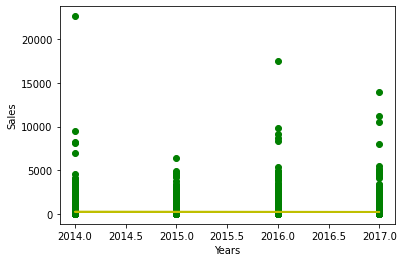

In [23]:
df.plot(kind='scatter', 
        x='Years', 
        y='Sales',
       color ='r')

plt.plot(X, 
         model_lm.predict(X), 
         linewidth=2, 
        color = 'y')

plt.scatter(x = X,
            y = Y, 
           color = 'g')

plt.show()

## Random Forest Regression by years

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33, random_state=42)

In [25]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators = 100)
model.fit(x_train,y_train.values.ravel())
# y=1×I(x<5)+2×I(5≤x≤10)+3×I(x>10)

RandomForestRegressor()

In [26]:
model.score(x_test,y_test)

0.6626242715802793

## conclusion

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [28]:
ran = RandomForestRegressor(n_estimators=100)
lin = LinearRegression()

In [29]:
models = {"Random forest" : ran,
          "Linear Regression" : lin}
scores= { }

In [30]:
for key, value in models.items():    
    model = value
    model.fit(x_train, y_train)
    scores[key] = model.score(x_test, y_test)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
scores_frame = pd.DataFrame(scores, index=["Accuracy Score"]).T
scores_frame.sort_values(by=["Accuracy Score"], axis=0 ,ascending=False, inplace=True)
scores_frame

,Accuracy Score
Random forest,0.664761
Linear Regression,0.315436



### By comparing the above results we can take the Random forest Regressor for the estimation of sales by year, with Random forrest regressor we can estimate the sales with 67% accuracy